KNN Predict Intensity Levels

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score


In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [4]:
#importing the dataset
dataset = pd.read_excel(r'/content/gdrive/My Drive/KNN/DataSet.xlsx')
print(len(dataset))
dataset.head()

300


,Aspect_Ratio_(w),Aspect_Ratio_(h),Diagonal_(L(cm)),Area(m²),Luminance_(cd/m²),Luminous_Intensity(I),Distance_(m),Light_Intensity,Time_min,Weighted_Algorithm,target
0,16.0,9.0,43.942,0.082507,300.0,24.752182,0.40,154.701,20.0,73.8804,1
1,16.0,9.0,39.624,0.067089,310.0,20.797490,0.77,35.078,76.0,59.6312,1
2,16.0,9.0,43.942,0.082507,550.0,45.379000,0.33,416.703,80.0,214.6812,2
3,16.0,9.0,16.256,0.011292,88.0,0.993671,0.40,6.210,77.0,48.6840,1
4,16.0,9.0,43.942,0.082507,671.0,55.362380,0.72,106.795,68.0,83.5180,2


Visualizing the data

In [5]:
dataset.target.value_counts()

1    153
2    103
0     44
Name: target, dtype: int64

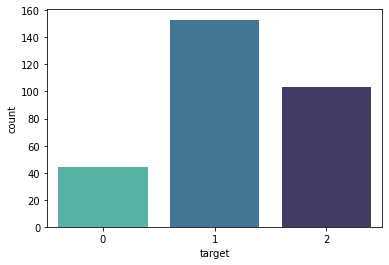

In [6]:
sns.countplot(x="target", data=dataset, palette="mako_r")
plt.show()

In [7]:
lessUse = len(dataset[dataset.target == 0])
mediumUse = len(dataset[dataset.target == 1])
heavyUse = len(dataset[dataset.target == 2])
print("Percentage of people facing in limit intensity: {:.2f}%".format((lessUse / (len(dataset.target))*100)))
print("Percentage of people facing moderately above in limit intensity: {:.2f}%".format((mediumUse / (len(dataset.target))*100)))
print("Percentage of people facing heavy intensity: {:.2f}%".format((heavyUse / (len(dataset.target))*100)))

Percentage of people facing in limit intensity: 14.67%
Percentage of people facing moderately above in limit intensity: 51.00%
Percentage of people facing heavy intensity: 34.33%


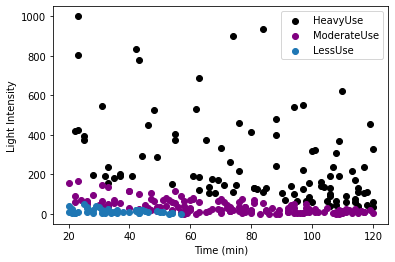

In [8]:
plt.scatter(x=dataset.Time_min[dataset.target==2], y=dataset.Light_Intensity[(dataset.target==2)], c="black")
plt.scatter(x=dataset.Time_min[dataset.target==1], y=dataset.Light_Intensity[(dataset.target==1)], c="purple")
plt.scatter(x=dataset.Time_min[dataset.target==0], y=dataset.Light_Intensity[(dataset.target==0)])
plt.legend(["HeavyUse", "ModerateUse","LessUse"])
plt.xlabel("Time (min)")
plt.ylabel("Light Intensity")
plt.show()

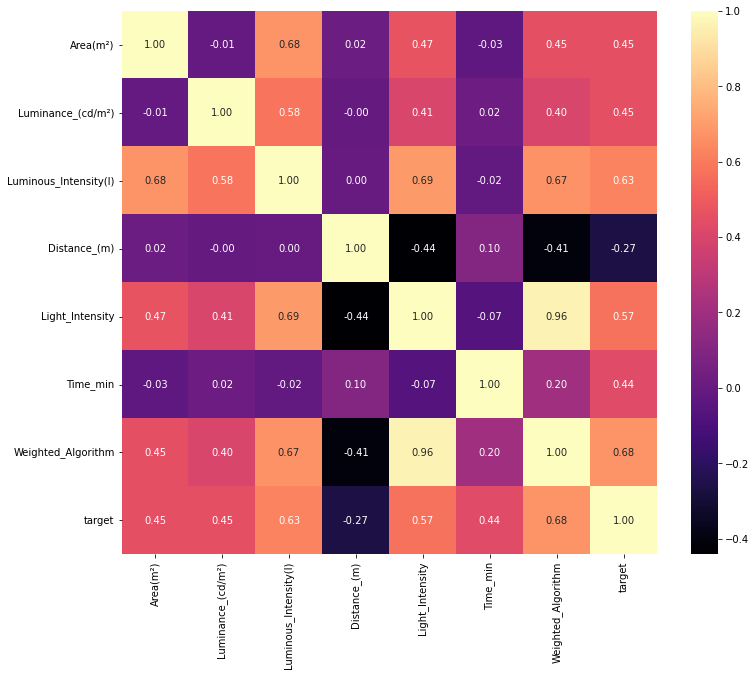

In [9]:
plt.figure(figsize=(12,10))
df= dataset.iloc[:,3:11]
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f')

In [10]:
#replace 0 in data
zeroNotAccepted=['Time_min','Light_Intensity','Distance_(m)']
for column in zeroNotAccepted:
    dataset[column]=dataset[column].replace(0,np.NaN)
    mean = int(dataset[column].mean(skipna=True))
    dataset[column]=dataset[column].replace(np.NaN,mean)

In [11]:
#split data
X= dataset.iloc[:,4:10]
Y= dataset.iloc[:,10]
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, random_state=0, test_size=0.2)

In [12]:
#feature scaling
sc_X = StandardScaler();
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [13]:
classifier = KNeighborsClassifier(n_neighbors=7,p=3,metric='euclidean')

In [14]:
classifier.fit(X_train,Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=7, p=3)

In [15]:
Y_pred = classifier.predict(X_test)
Y_pred

array([2, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 0, 2,
       2, 1, 0, 1, 1, 1, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 0,
       1, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 0, 2, 0])

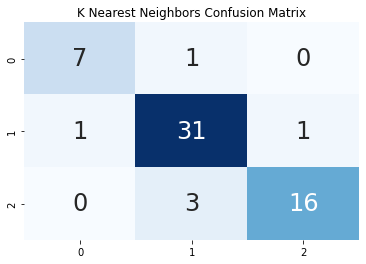

In [16]:
cm = confusion_matrix(Y_test, Y_pred)
plt.title("K Nearest Neighbors Confusion Matrix")
sns.heatmap(cm,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})

In [17]:
print(accuracy_score(Y_test,Y_pred))

0.9


In [18]:
import numpy as np
from sklearn import neighbors, datasets
from sklearn import preprocessing 
dl = float(input('Enter Diagonal Length (cm): '))
lum = float(input('Enter Luminance (nits): '))
dist = float(input('Enter Distance (m): '))
time = float(input('Enter Time (min): '))
area = (16*9*dl*dl)/((16*16) + (9*9))
lumInten = lum*area
lightInten = lumInten/(dist*dist)
dataClass = classifier.predict([[area,lum,lumInten,dist,lightInten,time]])
print('Prediction: '),

if dataClass == 0:
  print('low')
elif dataClass == 1:
  print('medium')
else:
  print('high')

Enter Diagonal Length (cm): 43.394
Enter Luminance (nits): 400
Enter Distance (m): 0.25
Enter Time (min): 120
Prediction: 
high


Naive Bayes classifier

In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report

In [20]:
dataset = pd.read_excel(r'/content/gdrive/My Drive/KNN/DataSet.xlsx')
print(len(dataset))
dataset.head()

300


,Aspect_Ratio_(w),Aspect_Ratio_(h),Diagonal_(L(cm)),Area(m²),Luminance_(cd/m²),Luminous_Intensity(I),Distance_(m),Light_Intensity,Time_min,Weighted_Algorithm,target
0,16.0,9.0,43.942,0.082507,300.0,24.752182,0.40,154.701,20.0,73.8804,1
1,16.0,9.0,39.624,0.067089,310.0,20.797490,0.77,35.078,76.0,59.6312,1
2,16.0,9.0,43.942,0.082507,550.0,45.379000,0.33,416.703,80.0,214.6812,2
3,16.0,9.0,16.256,0.011292,88.0,0.993671,0.40,6.210,77.0,48.6840,1
4,16.0,9.0,43.942,0.082507,671.0,55.362380,0.72,106.795,68.0,83.5180,2


In [21]:
dataset.drop(columns='Aspect_Ratio_(w)',inplace=True)
dataset.drop(columns='Aspect_Ratio_(h)',inplace=True)
dataset.drop(columns='Diagonal_(L(cm))',inplace=True)

In [22]:
# Split data into train and test sets

X = dataset.drop(columns='target',axis=1)
y = dataset.target
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.2,random_state=33,stratify=y)

In [23]:
# Fit train set for Gaussian Naive Bayes

GNB = GaussianNB()
GNB.fit(X_train,y_train)

GaussianNB()

In [24]:
# Predict for test set

y_pred = GNB.predict(X_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.73      1.00      0.84        35
           1       0.89      0.85      0.87       122
           2       0.93      0.84      0.89        83

    accuracy                           0.87       240
   macro avg       0.85      0.90      0.87       240
weighted avg       0.88      0.87      0.87       240

